In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df['created_at']= pd.to_datetime(df['created_at'])
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [5]:
df.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [6]:
df = df.sort_values(['created_at'],ascending=True)
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 00:08:09
1741,1742,39,910,268,2,cash,2017-03-01 00:10:19
3228,3229,97,912,324,2,cash,2017-03-01 00:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 00:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 00:22:25
...,...,...,...,...,...,...,...
2630,2631,53,940,112,1,credit_card,2017-03-30 23:12:13
1685,1686,34,818,244,2,cash,2017-03-30 23:16:10
1474,1475,21,815,142,1,cash,2017-03-30 23:26:54
317,318,52,848,292,2,cash,2017-03-30 23:41:34


In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [8]:
AOV = sum(df.order_amount)/len(df.total_items)
print("The Average Order Value is:", AOV)

The Average Order Value is: 3145.128


## 1a) A Better Way To Evaluate the data

### Calculating the AOV per shop 

In [9]:

#grouping the revenue generated by each shops together with sum aggregate
revenue_per_shop = df.groupby(['shop_id'])['order_amount'].agg('sum') 
revenue_per_shop.name ='Revenue'
#grouping the items sold by each shops together with sum aggregate
items_per_shop = df.groupby(['shop_id'])['total_items'].agg('sum')
items_per_shop.name = 'Items'
#grouping the orders taken by each shops together with count aggregate

orders_per_shop = df.groupby(['shop_id'])['total_items'].agg('count')
orders_per_shop.name = 'Orders'

#Adding them to a new dataFrame
df_per_shop = pd.concat([revenue_per_shop, orders_per_shop, items_per_shop], axis=1)

#Calculating Average Order value(AOV) and Average Item Value (AIV) per shop
aov_per_shop = df_per_shop['Revenue']/df_per_shop['Orders'] 
aov_per_shop.name = 'AOV'
aiv_per_shop = df_per_shop['Revenue']/df_per_shop['Items'] 
aiv_per_shop.name = 'AIV'
df_per_shop = pd.concat([revenue_per_shop, orders_per_shop , aov_per_shop, aiv_per_shop, items_per_shop], axis=1)
df_per_shop

,Revenue,Orders,AOV,AIV,Items
shop_id,,,,,
1,13588,44,308.818182,158.0,86
2,9588,55,174.327273,94.0,102
3,14652,48,305.250000,148.0,99
4,13184,51,258.509804,128.0,103
5,13064,45,290.311111,142.0,92
...,...,...,...,...,...
96,16830,51,330.000000,153.0,110
97,15552,48,324.000000,162.0,96
98,14231,58,245.362069,133.0,107


In [10]:
#Replacing Shop_id as the table index
df_per_shop.reset_index(inplace=True)
df_per_shop

,shop_id,Revenue,Orders,AOV,AIV,Items
0,1,13588,44,308.818182,158.0,86
1,2,9588,55,174.327273,94.0,102
2,3,14652,48,305.250000,148.0,99
3,4,13184,51,258.509804,128.0,103
4,5,13064,45,290.311111,142.0,92
...,...,...,...,...,...,...
95,96,16830,51,330.000000,153.0,110
96,97,15552,48,324.000000,162.0,96
97,98,14231,58,245.362069,133.0,107
98,99,18330,54,339.444444,195.0,94


In [11]:
#Using various metrics to calculate the AOV and AIV  
print("Mean AOV:",df_per_shop['AOV'].mean())
print("Median AOV:",df_per_shop['AOV'].median())
print("Mode AOV:",df_per_shop['AOV'].mode()[0])

print("Mean AIV:",df_per_shop['AIV'].mean())
print("Median AIV:",df_per_shop['AIV'].median())
print("Mode AIV:",df_per_shop['AIV'].mode()[0])

Mean AOV: 3136.834087887025
Median AOV: 308.8897584973166
Mode AOV: 162.85714285714286
Mean AIV: 407.99
Median AIV: 153.0
Mode AIV: 153.0


In [12]:
AOV = sum(df_per_shop.Revenue)/sum(df_per_shop.Orders)
print("The Average Order Value is:", AOV)


AIV = sum(df_per_shop.Revenue)/sum(df_per_shop.Items)
print("The Average Order Value is:", AIV)


The Average Order Value is: 3145.128
The Average Order Value is: 357.92152221412965


In [13]:
#Checking out the metric overview of the DataFrame to figure out the issue with the previous evaluation
df_per_shop.describe()

,shop_id,Revenue,Orders,AOV,AIV,Items
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.572564e+05,50.000000,3136.834088,407.990000,439.360000
std,29.011492,1.216218e+06,7.287737,23935.881130,2557.462906,3396.366111
min,1.000000,6.840000e+03,35.000000,162.857143,90.000000,67.000000
25%,25.750000,1.293050e+04,44.750000,263.675962,132.750000,88.000000
50%,50.500000,1.488750e+04,50.000000,308.889758,153.000000,100.000000
75%,75.250000,1.760000e+04,55.000000,336.628352,168.250000,111.250000
max,100.000000,1.199018e+07,68.000000,235101.490196,25725.000000,34063.000000


The average AOV is now $407.99, which is also higher than projected for a single shoe purchase price range. This indicates that some of the orders are incorrect.
The fact that the mean number appears to be greater indicates that the data may contain outliers that skew the results.
The minimum AOV is 90, which appears to be a reasonable price.

With a maximum AOV of 25725, it looks that someone is selling sneakers for a ridiculous amount.

The sneaker price ($168) appears to be affordable till 75 percent of the distribution.

Let's take a closer look at the data distribution.

<AxesSubplot:xlabel='shop_id', ylabel='AOV'>

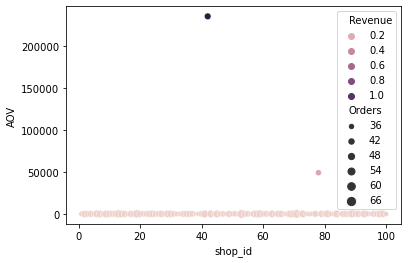

In [14]:
#Visualizing the AOV to find outliers (Suspicious Activities)
sns.scatterplot( x = 'shop_id', y = 'AOV', data = df_per_shop, hue = 'Revenue', size = 'Orders')

<AxesSubplot:xlabel='shop_id', ylabel='AIV'>

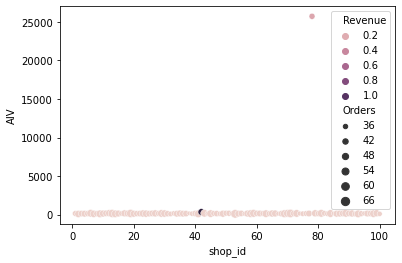

In [15]:
#Visualizing the AIV to find outliers(Suspicious Activities)
sns.scatterplot( x = 'shop_id', y = 'AIV', data = df_per_shop, hue = 'Revenue', size = 'Orders')

In [16]:
df_per_shop.index

RangeIndex(start=0, stop=100, step=1)

In [17]:
#Finding the Outliers
Outlier = []
for i, j in zip(df_per_shop.shop_id, df_per_shop.AOV):
    if j > 20000 and i != 'NaN':
        Outlier.append([i, j])
print(Outlier)

[[42, 235101.49019607843], [78, 49213.04347826087]]


In [18]:
#Identifying and bringing out the outlier
a = df_per_shop.loc[df_per_shop.shop_id.isin([42,78])]
a

,shop_id,Revenue,Orders,AOV,AIV,Items
41,42,11990176,51,235101.490196,352.0,34063
77,78,2263800,46,49213.043478,25725.0,88


In [19]:
#Checking Out The Outlier
df.loc[df.shop_id == 42]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4421,4422,42,736,704,2,credit_card,2017-03-01 12:19:49
2018,2019,42,739,352,1,debit,2017-03-01 12:42:26
2491,2492,42,868,704,2,debit,2017-03-01 18:33:33
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2987,2988,42,819,1056,3,cash,2017-03-03 09:09:25
4231,4232,42,962,352,1,cash,2017-03-04 00:01:19
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
2766,2767,42,970,704,2,credit_card,2017-03-05 10:45:42


Order details from Shop_id 42 shows some anomalies with $704000 order amount and with total items 2000, and average item value of just $352.0. This could be that the shop is a high end one but the variation of its price in relation to the other shops will skew our results and give inaccurate results. 

In [20]:
df.loc[df.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 03:02:10
4412,4413,78,756,51450,2,debit,2017-03-02 04:13:39
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:44
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57


Order details from Shop_id 78 shows some anomalies with average item value of $25725.0, which seems impossible for a sneaker. This is an anomaly that points to a suspicious activity and will skew our results and give inaccurate results. 

In [21]:
#Droppping the outliers from the dataset
df_per_shop.drop(a.index, inplace=True)

In [22]:
df_per_shop.loc[df_per_shop.shop_id.isin([42,78])]

,shop_id,Revenue,Orders,AOV,AIV,Items


In [23]:
#Rechecking the overview of the metric of the dataset after dropping the outliers
df_per_shop.describe()

,shop_id,Revenue,Orders,AOV,AIV,Items
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000
mean,50.306122,15016.979592,50.030612,299.682399,150.22449,99.846939
std,29.162329,3469.426421,7.350509,50.896733,23.91675,16.365259
min,1.000000,6840.000000,35.000000,162.857143,90.00000,67.000000
25%,25.250000,12803.500000,44.250000,262.661218,132.25000,88.000000
50%,50.500000,14763.000000,50.000000,308.827696,153.00000,100.000000
75%,74.750000,17478.000000,55.000000,334.631226,165.75000,111.000000
max,100.000000,23128.000000,68.000000,403.545455,201.00000,136.000000


In [24]:
#Using various metrics to calculate the AOV and AIV  
print("Mean AOV:",df_per_shop['AOV'].mean())
print("Median AOV:",df_per_shop['AOV'].median())
print("Mode AOV:",df_per_shop['AOV'].mode()[0])

print("Mean AIV:",df_per_shop['AIV'].mean())
print("Median AIV:",df_per_shop['AIV'].median())
print("Mode AIV:",df_per_shop['AIV'].mode()[0])

Mean AOV: 299.68239912615485
Median AOV: 308.8276955602537
Mode AOV: 162.85714285714286
Mean AIV: 150.22448979591837
Median AIV: 153.0
Mode AIV: 153.0


## 1b) What metric would you report for this dataset?

For AIV per shop, metrics like median or mode are preferable than mean since they are less impacted by exceptionally large values in the distribution. The median and mode in this dataset were the same.
Because we're looking at 100 stores, the most common sneaker price (mode) should offer us a more realistic picture. I would report the mode value per shop rather than the AIV.

For the AOV, I would report the mean. AOV is the average order value, one order can have more that one item sold. 

##  1c) What is its value?

 Its value is $152 for AIV and 300 for AOV

# Question 2:

##  2a) How many orders were shipped by Speedy Express in total?

QUERY:

SELECT COUNT(ShipperID) 
FROM [Orders] 
WHERE (SELECT ShipperID 
        FROM [Shippers] 
        WHERE ShipperName = "Speedy Express") = ShipperID;
        

NUMERICAL ANSWER: 54


##  2b) What is the last name of the employee with the most orders?

QUERY: 

SELECT LastName 
FROM Orders 
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.EmployeeID
ORDER BY COUNT(Orders.OrderID) DESC
LIMIT 1;


NUMERICAL ANSWER: Peacock

##  2C) What product was ordered the most by customers in Germany?

QUERY:
    
SELECT ProductName, SUM(Quantity) AS QuantitySum
FROM Orders, OrderDetails, Customers, Products
WHERE Country = "Germany" AND OrderDetails.orderID = Orders.OrderID AND OrderDetails.ProductID = Products.ProductID AND Customers.CustomerID = Orders.CustomerID
GROUP BY Products.ProductID
ORDER BY QuantitySum DESC
LIMIT 1;



NUMERICAL ANSWER: Boston Crab Meat